ymedia =  1.5428571428571427
f = 0.516666666666667*x**2 - 3.1*x + 4.12619047619047
coef_determinacion r2 =  0.9976060336426423
99.76% de los datos
se describe con el modelo:


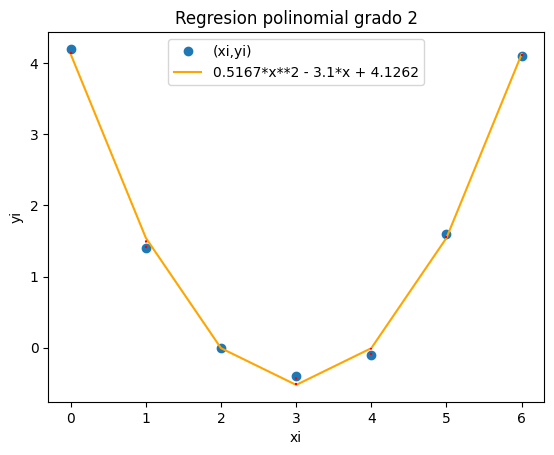

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO
xi = [0, 1, 2, 3, 4, 5, 6]
yi = [4.2, 1.4, 0, -0.4, -0.1, 1.6, 4.1]
m  = 2

# PROCEDIMIENTO
xi = np.array(xi)
yi = np.array(yi)
n  = len(xi)

# llenar matriz a y vector B
k = m + 1
A = np.zeros(shape=(k,k),dtype=float)
B = np.zeros(k,dtype=float)
for i in range(0,k,1):
    for j in range(0,i+1,1):
        coeficiente = np.sum(xi**(i+j))
        A[i,j] = coeficiente
        A[j,i] = coeficiente
    B[i] = np.sum(yi*(xi**i))

# coeficientes, resuelve sistema de ecuaciones
C = np.linalg.solve(A,B)

# polinomio
x = sym.Symbol('x')
f = 0
fetiq = 0
for i in range(0,k,1):
    f = f + C[i]*(x**i)
    fetiq = fetiq + np.around(C[i],4)*(x**i)

fx = sym.lambdify(x,f)
fi = fx(xi)

# errores
ym = np.mean(yi)
xm = np.mean(xi)
errado = fi - yi

sr = np.sum((yi-fi)**2)
syx = np.sqrt(sr/(n-(m+1)))
st = np.sum((yi-ym)**2)

# coeficiente de determinacion
r2 = (st-sr)/st
r2_porcentaje = np.around(r2*100,2)

# SALIDA
print('ymedia = ',ym)
print('f =',f)
print('coef_determinacion r2 = ',r2)
print(str(r2_porcentaje)+'% de los datos')
print('se describe con el modelo:')

# grafica
plt.plot(xi,yi,'o',label='(xi,yi)')
# plt.stem(xi,yi, bottom=ym)
plt.plot(xi,fi, color='orange', label=fetiq)

# lineas de error
for i in range(0,n,1):
    y0 = np.min([yi[i],fi[i]])
    y1 = np.max([yi[i],fi[i]])
    plt.vlines(xi[i],y0,y1, color='red',
               linestyle = 'dotted')

plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.title('Regresion polinomial grado '+str(m))
plt.show()